# Proiect extreme in 2D

#### Realizat de Dontu Tudor-Stefan grupa 312AA

Pentru inceput am efectuat importarea bibliotecilor utilizate si declararea lui x si y drept simboluri pentru sympy:

In [1]:
import matplotlib.pyplot as plt #MATPLOTLIB PT GRAFIC
from IPython.display import Math #PENTRU A AFISA FRUMOS LATEX IN NOTEBOOK
from sympy import * #SYMPY PENTRU CALCUL SIMBOLIC
import numpy as np #NUMPY PENTRU A AJUTA LA GRAFIC
x, y = symbols('x, y', real=True) #DECLARAREA LUI x SI y DREPT SIMBOLURI, CU VALORI REALE

Aici am efectuat citirea coeficientilor functiei, precum si afisarea functiei:

In [2]:
print('Introdu coeficientul lui x**3')
a=int(input())
print('Introdu coeficientul lui x**2')
d=int(input())
print('Introdu coeficientul lui x')
e=int(input())
print('Introdu coeficientul lui y**3')
b=int(input())
print('Introdu coeficientul lui y**2')
i=int(input())
print('Introdu coeficientul lui y')
j=int(input())
print('Introdu coeficientul lui x**2*y')
g=int(input())
print('Introdu coeficientul lui x*y**2')
h=int(input())
print('Introdu coeficientul lui x*y')
c=int(input())
print('Introdu termenul liber: ')
k=int(input())
f = a*x**3 + d*x**2 + e*x + g*x**2*y + h*x*y**2 + b*y**3 +c*x*y + i*y**2 + j*y + k # INITIALIZAREA FUNCTIEI
print('Functia prelucrata este: ')
Math(str(f))

Introdu coeficientul lui x**3
6
Introdu coeficientul lui x**2
0
Introdu coeficientul lui x
0
Introdu coeficientul lui y**3
6
Introdu coeficientul lui y**2
0
Introdu coeficientul lui y
0
Introdu coeficientul lui x**2*y
3
Introdu coeficientul lui x*y**2
1
Introdu coeficientul lui x*y
-2
Introdu termenul liber: 
0
Functia prelucrata este: 


<IPython.core.display.Math object>

Aici vom rezolva sistemul pentru determinarea posibilelor puncte critice, asa cum facem si la teorie:

In [3]:
eq1 = Eq(diff(f,x),0)   #Definim doua ecuatii, ele reprezentand derivatele partiale in functie de x, respectiv y
eq2 = Eq(diff(f,y),0)   #apoi le rezolvam, folosind functia solve(), provenita din sympy, si le stocam in variabila
sol=solve((eq1,eq2),(x,y))  #sol. FUNCTII UTILIZATE: DIFF, SOLVE, EQ
print('Coordonate pentru puncte critice: ')
print(sol)

Coordonate pentru puncte critice: 
[(0, 0), ((-280/11237 + (-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 56444/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3)))*(-1583640/11237 + 23314*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 1315935416/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3)) + 11237*(-280/11237 + (-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 56444/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3)))**2)/2592, -280/11237 + (-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 56444/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3))), ((-280/11237 - 56444/(126270169*(-1/2 + sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(

Memoram coordonatele x si y pentru fiecare punct in parte (de asemenea verificam si daca punctul respectiv exista, adica daca vectorul sol are lungimea potrivita si avem de unde sa scoatem datele):

In [4]:
#punctul 1
x1=sol[0][0]
y1=sol[0][1]
#punctul 2
if(1<len(sol)):
    x2=sol[1][0]
    y2=sol[1][1]
#punctul 3
if(2<len(sol)):
    x3=sol[2][0]
    y3=sol[2][1]

Ceea ce este echivalent cu ce faceam la teorie, adica rezolvarea sistemului:
$$
\left\{
    \begin{array}\\
    \frac{\partial f}{\partial x} \\
    \frac{\partial f}{\partial y}
    \end{array}
\right.
$$

Apoi, urmand teoria, vom alcatui matricea hessiana:

In [5]:
Hf=hessian(f,[x,y]) #FUNCTIA HESSIAN GENEREAZA HESSIANA UNEI FUNCTII
print('Matricea hessiana a functiei: ')
pprint(Hf)

Matricea hessiana a functiei: 
⎡ 36⋅x + 6⋅y    6⋅x + 2⋅y - 2⎤
⎢                            ⎥
⎣6⋅x + 2⋅y - 2   2⋅x + 36⋅y  ⎦


Ceea ce este echivalent cu generarea matricei:
$$
\begin{pmatrix}
    \frac{\partial f}{\partial x^2} & \frac{\partial f}{\partial x \partial y} \\
    \frac{\partial f}{\partial y \partial x} & \frac{\partial f}{\partial x^2}
\end{pmatrix}
$$

In cele din urma, pentru fiecare punct critic obtinut, vom calcula valorile proprii ale hessianei, inlocuind pe x si y din hessiana cu x si y-ul fiecarui punct critic

In [6]:
HfA=Hf.subs([(x,x1), (y,y1)]) #folosind .subs efectuam substituirea, in loc de x vom pune x1 ()
if(1<len(sol)): #verificam numarul de solutii, astfel incat sa nu depasim incadrarea in vectorul sol
    HfB=Hf.subs([(x,x2), (y,y2)])
if(2<len(sol)):
    HfC=Hf.subs([(x,x3), (y,y3)])
print('HfA=')
pprint(HfA)
if(1<len(sol)):
    print('HfB=')
    pprint(HfB)
if(2<len(sol)):
    print('HfC=')
    pprint(HfC)

HfA=
⎡0   -2⎤
⎢      ⎥
⎣-2  0 ⎦
HfB=
⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                             _____________________________                   
⎢   1680     ⎛  1   √3⋅ⅈ⎞    ╱   1044843832    288⋅√104253                    
⎢- ───── + 6⋅⎜- ─ - ────⎟⋅3 ╱  ───────────── + ───────────  - ────────────────
⎢  11237     ⎝  2    2  ⎠ ╲╱   1418897889053    126270169                     
⎢                                                                       ⎛  1  
⎢                                                             126270169⋅⎜- ─ -
⎢              

⎡                                                                             
⎢          ⎛                                                                  
⎢          ⎜   280                             56444                          
⎢          ⎜- ───── - ────────────────────────────────────────────────────────
⎢          ⎜  11237                              _____________________________
⎢          ⎜                    ⎛  1   √3⋅ⅈ⎞    ╱   1044843832    288⋅√104253 
⎢          ⎜          126270169⋅⎜- ─ + ────⎟⋅3 ╱  ───────────── + ─────────── 
⎢   1680   ⎝                    ⎝  2    2  ⎠ ╲╱   1418897889053    126270169  
⎢- ───── + ───────────────────────────────────────────────────────────────────
⎢  11237                                                                      
⎢                                                                             
⎢                                                                             
⎢                                                   

Dupa cum se poate observa, am generat matricea hessiana specifica fiecarui punct critic.
Pasul urmator, conform teoriei, pentru a afla valorile proprii, este sa rezolvam polinoamele caracteristice.

In [7]:
PcarA=(HfA[0]-x)*(HfA[3]-x)-HfA[1]*HfA[2]
if(1<len(sol)):
    PcarB=(HfB[0]-x)*(HfB[3]-x)-HfB[1]*HfB[2]
if(2<len(sol)):
    PcarC=(HfC[0]-x)*(HfC[3]-x)-HfC[1]*HfC[2]
print('Polinoamele caracteristice sunt: ')
print('Pentru punctul A('+str(sol[0][0])+','+str(sol[0][1])+'): '+str(PcarA))
if(1<len(sol)):
    print('Pentru punctul B('+str(sol[1][0])+','+str(sol[1][1])+'): '+str(PcarB))
if(2<len(sol)):
    print('Pentru punctul C('+str(sol[2][0])+','+str(sol[2][1])+'): '+str(PcarC))

Polinoamele caracteristice sunt: 
Pentru punctul A(0,0): x**2 - 4
Pentru punctul B((-280/11237 + (-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 56444/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3)))*(-1583640/11237 + 23314*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 1315935416/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3)) + 11237*(-280/11237 + (-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 56444/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3)))**2)/2592,-280/11237 + (-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3) - 56444/(126270169*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 288*sqrt(104253)/126270169)**(1/3))): (-x - 10080/11237 + 36*(-1/2 - sqrt(3)*I/2)*(1044843832/1418897889053 + 28

Polinomul caracteristic se obtine calculand determinantul ce se obtine daca scadem din hessiana specifica fiecarui punct critic un x pe diagonala principala, adica, spre exemplu, pentru punctul A:
$$
\begin{vmatrix}
f_{xx}(xA,yA)-x & f_{xy}(xA,yA)\\
f_{yx}(xA,yA) & f_{yy}(xA,yA)-x
\end{vmatrix}
$$
Vom trece apoi la rezolvarea acestora, si aflarea solutiilor polinoamelor caracteristice, adica a valorilor proprii, pentru fiecare punct critic in parte:

In [8]:
solPcarA=solve(PcarA,x)
if(1<len(sol)):
    solPcarB=solve(PcarB,x)
if(2<len(sol)):
    solPcarC=solve(PcarC,x)

Am ajuns la final, ca sa aflam natura punctelor critice, trebuie sa ne uitam la valorile proprii pentru fiecare dintre acestea, conform teoriei:

Daca 𝜆1,𝜆2>0, atunci punctul 𝐴𝑖 este de minim local

Daca 𝜆1,𝜆2<0, punctul 𝐴𝑖 este maxim local

Daca 𝜆1⋅𝜆2<0, punctul 𝐴𝑖 nu este de extrem

Daca 𝜆1⋅𝜆2= 0, nu putem decide

Aceste verificari au fost implementate folosind if-uri. A se observa, de asemenea, verificarea existentei punctelor B si C, inainte de fiecare operatie ce le cuprinde.

In [9]:
if(solPcarA[0]*solPcarA[1]<0):
    print('A('+str(sol[0][0])+','+str(sol[0][1])+') este punct sa')
if(solPcarA[0]*solPcarA[1]==0):
    print('Nu putem decide pt punctul A')
if(solPcarA[0]>0 and solPcarA[1]>0):
    print('A(' + str(sol[0][0]) + ',' + str(sol[0][1]) + ') este punct de minim local')
if(solPcarA[0]<0 and solPcarA[1]<0):
    print('A(' + str(sol[0][0]) + ',' + str(sol[0][1]) + ') este punct de maxim local')

if(1<len(sol)):
    if(solPcarB[0]*solPcarB[1]<0):
        print('B('+str(sol[1][0])+','+str(sol[1][1])+') este punct sa')
    if(solPcarA[0]*solPcarA[1]==0):
        print('Nu putem decide pt punctul B')
    if(solPcarB[0]>0 and solPcarB[1]>0):
        print('B(' + str(sol[1][0]) + ',' + str(sol[1][1]) + ') este punct de minim local')
    if(solPcarB[0]<0 and solPcarB[1]<0):
        print('B(' + str(sol[1][0]) + ',' + str(sol[1][1]) + ') este punct de maxim local')
if(2<len(sol)):
    if(solPcarC[0]*solPcarC[1]<0):
        print('C('+str(sol[2][0])+','+str(sol[2][1])+') este punct sa')
    if(solPcarC[0]*solPcarC[1]==0):
        print('Nu putem decide pt punctul C')
    if(solPcarC[0]>0 and solPcarC[1]>0):
        print('C(' + str(sol[2][0]) + ',' + str(sol[2][1]) + ') este punct de minim local')
    if(solPcarC[0]<0 and solPcarC[1]<0):
        print('C(' + str(sol[2][0]) + ',' + str(sol[2][1]) + ') este punct de maxim local')


A(0,0) este punct sa


TypeError: cannot determine truth value of Relational

Desenarea graficului:

TypeError: can't convert complex to float

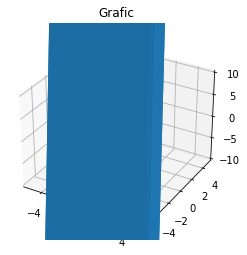

In [10]:
#A fost redefinita functia
def f(x, y):
    return a*x**3 + d*x**2 + e*x + g*x**2*y + h*x*y**2 + b*y**3 +c*x*y + i*y**2 + j*y + k
#Au fost declarate spatiile X, Y
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
#Se calculeaza Z in functie de X si Y
Z = f(X,Y)
#Se defineste tipul proiectiei, precum si limite si un titlu
ax = plt.axes(projection='3d')
ax.set_zlim(-10, 10)
ax.set_title('Grafic')
#Se face plot la suprafata
ax.plot_surface(X, Y, Z, linewidth=0,zorder=0)
#Se afiseaza punctele
ax.scatter(x1,y1,f(x1,y1),s=500,marker='x',zorder=5)
if(1<len(sol)):
    ax.scatter(x2,y2,f(x2,y2),s=500,marker='x',zorder=5)
if(2<len(sol)):
    ax.scatter(x3,y3,f(x3,y3),s=500,marker='x',zorder=5)
plt.xlabel('Axa X' ,fontsize=10)
plt.ylabel('Axa Y' ,fontsize=10)
plt.show()